[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fnNCdBx3VmRagTIqmhZ8x_vBySYo9xE9?usp=sharing)

In [ ]:
# install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.6 MB/s e

## Data Collection

In [ ]:
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
energy_data_fpath = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments5/Task2/energy_consumption_data.csv'

Mounted at /content/gdrive


## Initial Data Exploration

In [ ]:
# read data
import pandas as pd
energy_data = pd.read_csv(energy_data_fpath)

# check data
energy_data.shape

(1228, 4)

In [ ]:
# Display the first few rows of the dataset
energy_data.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


## Step 2: Data Cleaning and Preprocessing

### 2.1 Removing Unnecessary Columns


In [ ]:
# Drop the "Unnamed: 0" column
energy_data.drop(columns=["Unnamed: 0"], inplace=True)

# Display the updated dataset
energy_data.head()


,TxnDate,TxnTime,Consumption
0,01 Jan 2022,16:55:52,1.010
1,01 Jan 2022,21:45:29,0.908
2,01 Jan 2022,12:24:52,0.926
3,01 Jan 2022,04:07:36,0.928
4,01 Jan 2022,06:52:25,0.916


## 2.2 Checking for Missing Values


In [ ]:
# Check for missing values
missing_values = energy_data.isnull().sum()

missing_values


TxnDate        0
TxnTime        0
Consumption    0
dtype: int64

## 2.3 Data Type Conversion


In [ ]:
# Convert 'TxnDate' and 'TxnTime' to a single datetime column 'Timestamp'
energy_data['Timestamp'] = pd.to_datetime(energy_data['TxnDate'] + ' ' + energy_data['TxnTime'])

# Drop the original 'TxnDate' and 'TxnTime' columns
energy_data.drop(columns=['TxnDate', 'TxnTime'], inplace=True)

# Reorder the columns for better readability
energy_data = energy_data[['Timestamp', 'Consumption']]

# Display the updated dataset
energy_data.head()


,Timestamp,Consumption
0,2022-01-01 16:55:52,1.010
1,2022-01-01 21:45:29,0.908
2,2022-01-01 12:24:52,0.926
3,2022-01-01 04:07:36,0.928
4,2022-01-01 06:52:25,0.916


## 2.4 Checking for Duplicates


In [ ]:
# Check for duplicate rows based on the 'Timestamp' column
duplicate_rows = energy_data[energy_data.duplicated(subset=['Timestamp'])]

duplicate_rows


,Timestamp,Consumption
197,2022-01-04 06:56:02,0.994
246,2022-01-05 22:17:28,9.046
315,2022-01-06 12:17:50,6.874
363,2022-01-07 08:06:46,9.496
556,2022-01-10 12:18:24,0.914
1193,2022-01-20 00:42:08,2.948


## Remove Duplicates

In [ ]:
# Average the 'Consumption' values for duplicate 'Timestamp' entries
energy_data = energy_data.groupby('Timestamp', as_index=False).agg({'Consumption': 'mean'})

# Check the dataset again for duplicate rows based on the 'Timestamp' column
duplicate_rows_after_processing = energy_data[energy_data.duplicated(subset=['Timestamp'])]

duplicate_rows_after_processing


,Timestamp,Consumption


## 2.5 Sorting Data by Timestamp


In [ ]:
# Sort the dataset by 'Timestamp'
energy_data = energy_data.sort_values(by="Timestamp")

# Reset the index after sorting
energy_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the sorted dataset
energy_data.head()


,Timestamp,Consumption
0,2022-01-01 00:22:28,1.030
1,2022-01-01 00:42:33,0.904
2,2022-01-01 01:01:51,0.904
3,2022-01-01 01:41:48,1.850
4,2022-01-01 02:22:52,1.878


## Step 3: Descriptive Statistics


In [ ]:
# Generate descriptive statistics for the 'Consumption' column
consumption_stats = energy_data['Consumption'].describe()

consumption_stats


count    1222.000000
mean        3.420254
std         3.533558
min         0.842000
25%         0.952000
50%         1.118000
75%         5.746500
max        27.108000
Name: Consumption, dtype: float64

## Step 4: Data Visualization


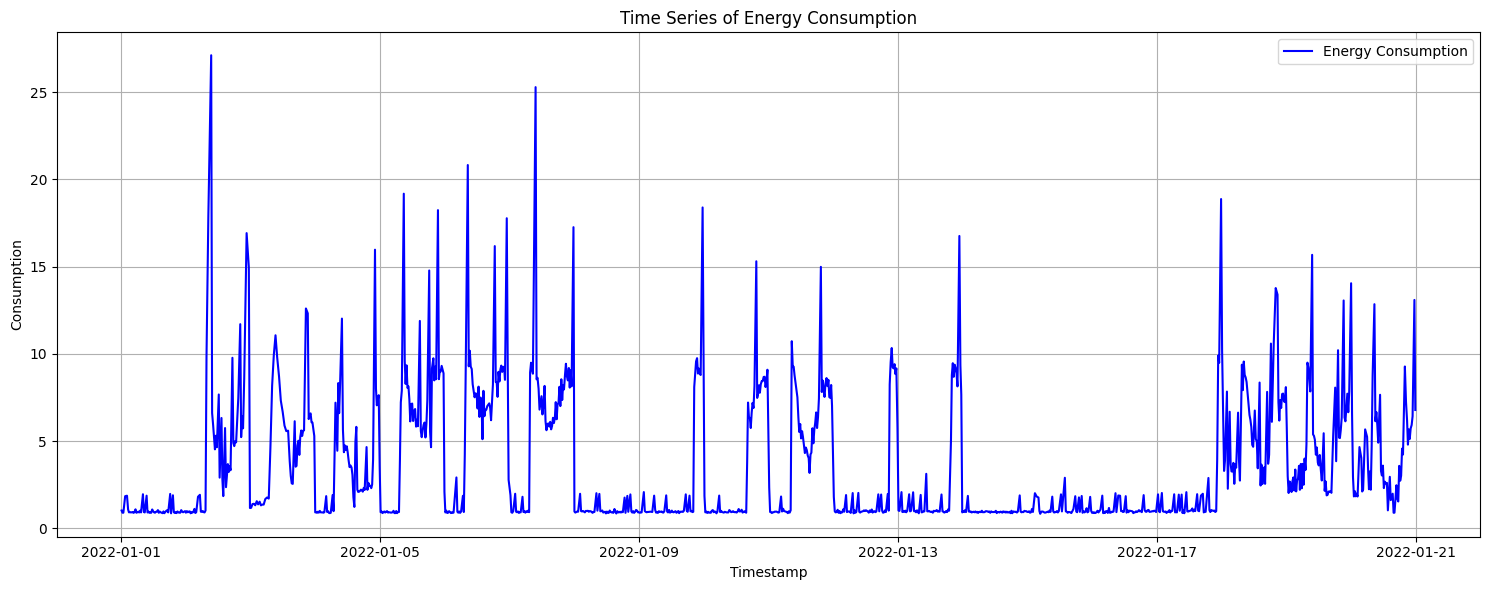

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series of energy consumption
plt.figure(figsize=(15, 6))
plt.plot(energy_data['Timestamp'], energy_data['Consumption'], label="Energy Consumption", color="blue")
plt.title("Time Series of Energy Consumption")
plt.xlabel("Timestamp")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


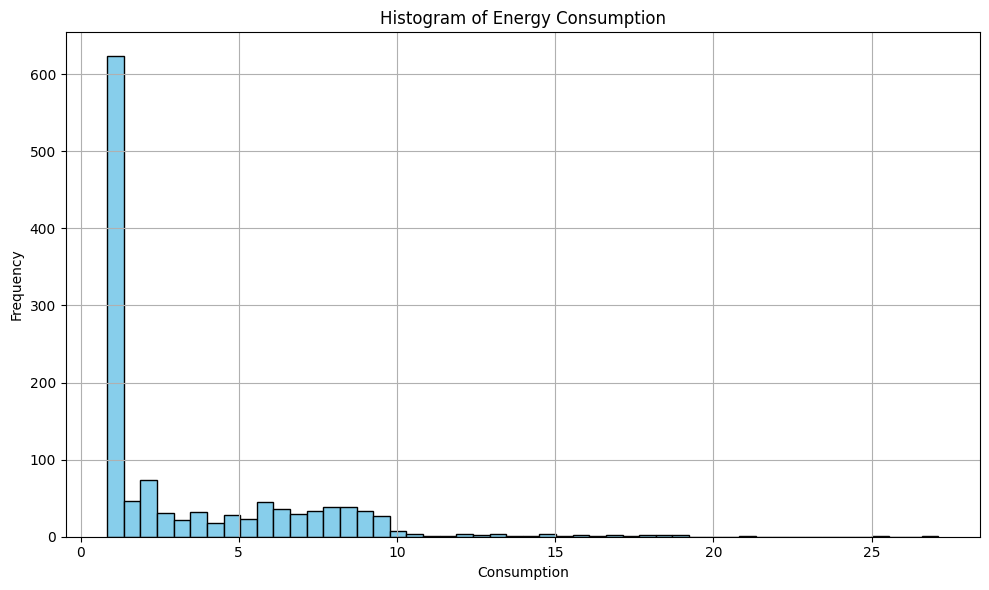

In [ ]:
# Plotting the histogram for energy consumption
plt.figure(figsize=(10, 6))
plt.hist(energy_data['Consumption'], bins=50, color="skyblue", edgecolor="black")
plt.title("Histogram of Energy Consumption")
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


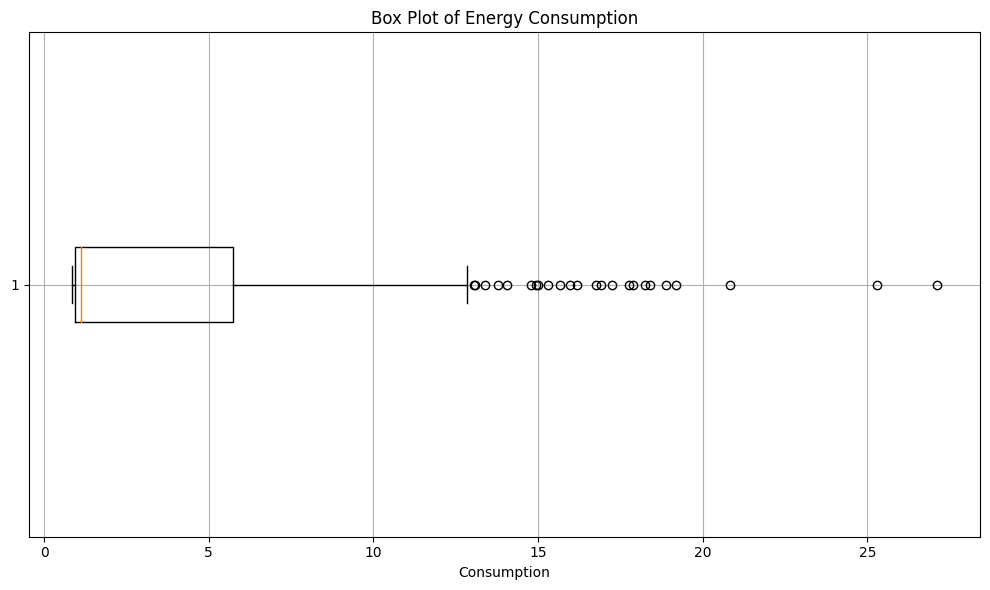

In [ ]:
# Plotting the box plot for energy consumption
plt.figure(figsize=(10, 6))
plt.boxplot(energy_data['Consumption'], vert=False)
plt.title("Box Plot of Energy Consumption")
plt.xlabel("Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 5: Time Series Decomposition


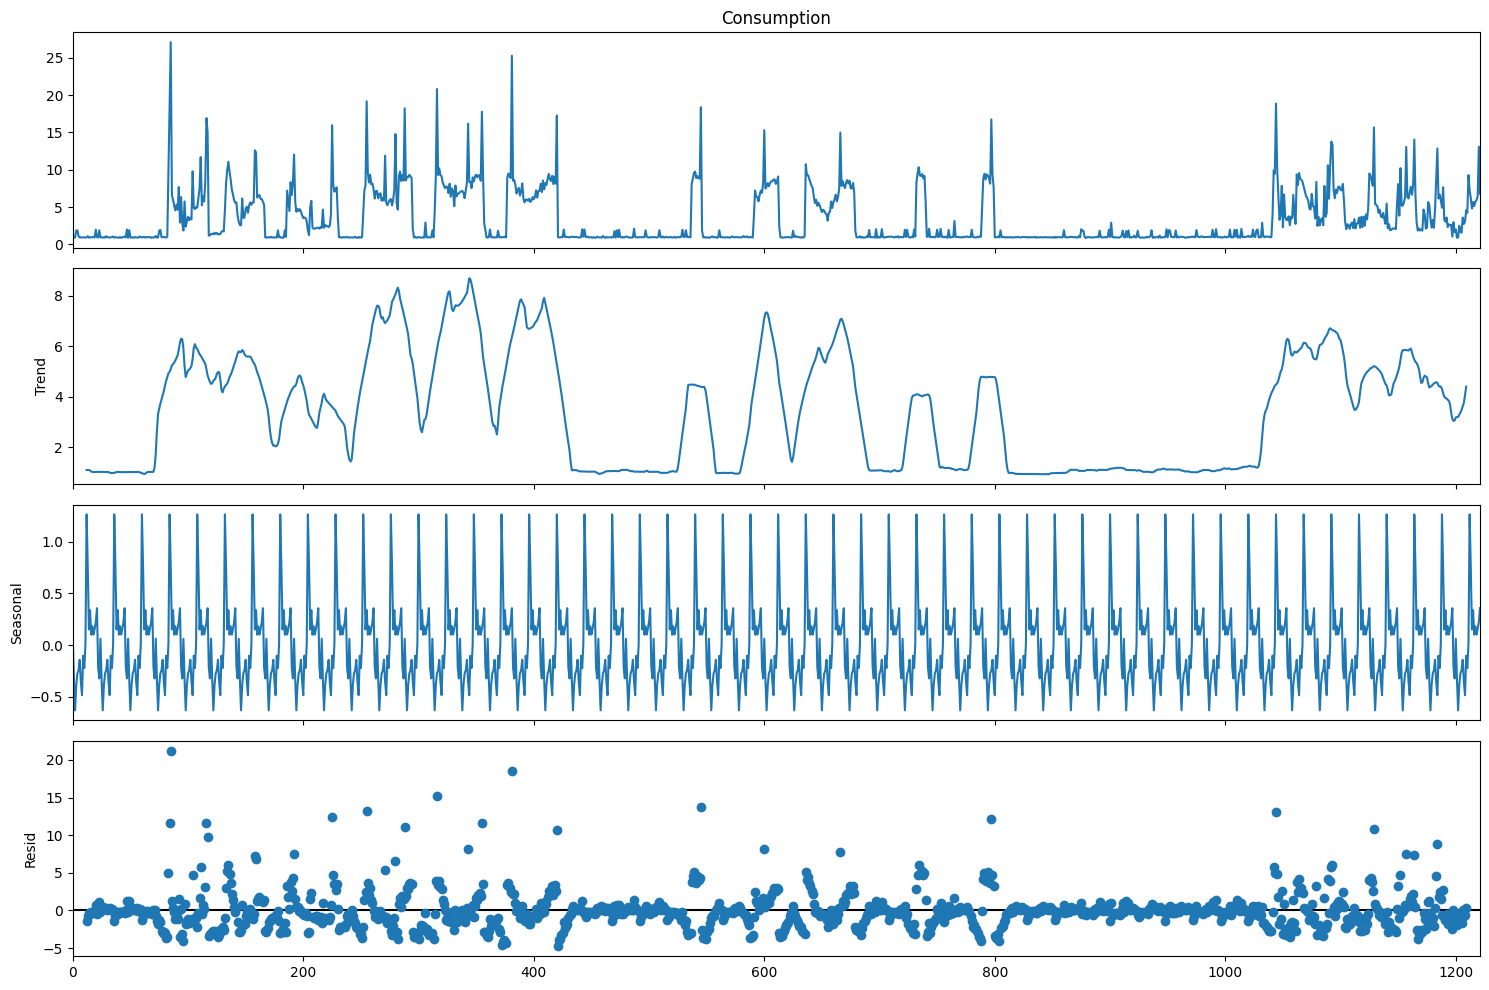

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(energy_data['Consumption'], model='additive', period=24) # assuming daily seasonality

# Plotting the decomposed components
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.tight_layout()
plt.show()


## Step 6: Further Time Series Analysis


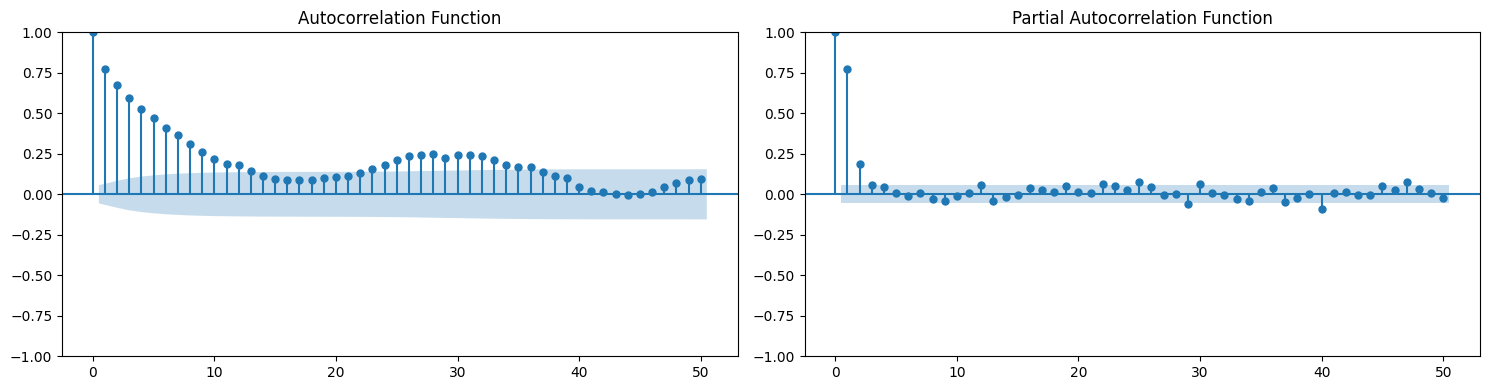

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting Autocorrelation Function (ACF)
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF
plot_acf(energy_data['Consumption'], ax=ax[0], lags=50, title="Autocorrelation Function")

# PACF
plot_pacf(energy_data['Consumption'], ax=ax[1], lags=50, title="Partial Autocorrelation Function")

plt.tight_layout()
plt.show()


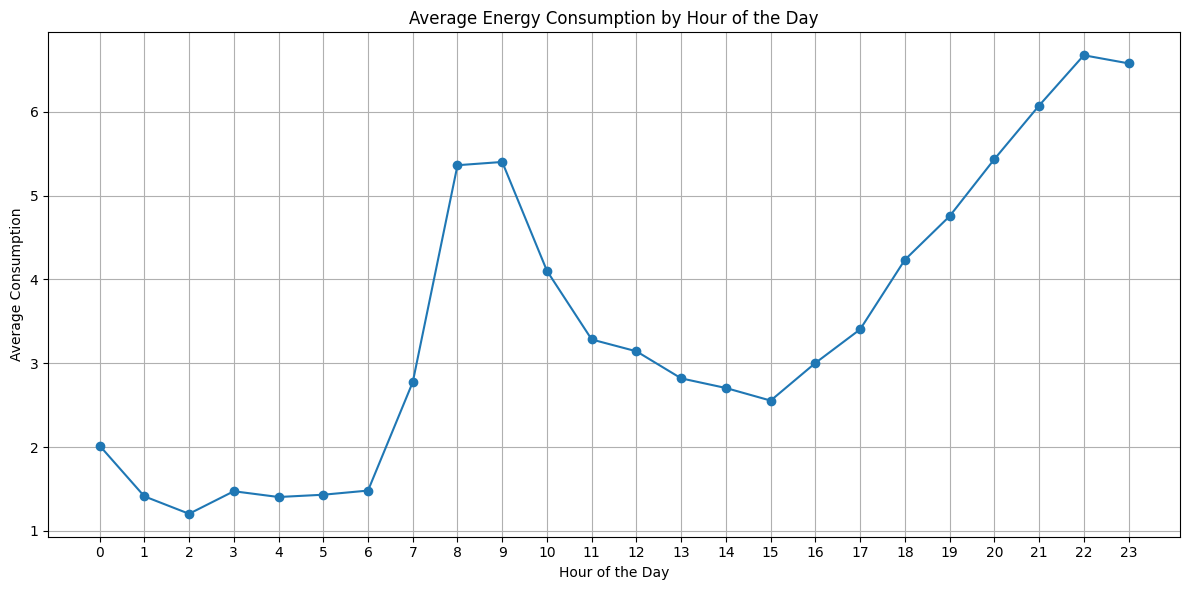

In [ ]:
# Extracting hour from the Timestamp and calculating mean consumption for each hour
hourly_pattern = energy_data.groupby(energy_data['Timestamp'].dt.hour)['Consumption'].mean()

# Plotting the average consumption by hour of the day
plt.figure(figsize=(12, 6))
hourly_pattern.plot(marker='o', linestyle='-')
plt.title("Average Energy Consumption by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Consumption")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights:
- Seasonality & Trend: The data exhibits clear daily seasonality with some underlying trend. This seasonality and trend should be accounted for when modeling or forecasting.

- Autocorrelation: The ACF and PACF plots indicate potential autoregressive terms, which could be considered if ARIMA or similar models are used for forecasting.

- Daily Patterns: The highest energy consumption typically occurs in the late evening, while the lowest occurs during the early morning hours. This insight could be valuable for energy management, planning, or pricing strategies.

In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(energy_data, target='Consumption', session_id = 111)

,Description,Value
0,session_id,111
1,Target,Consumption
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1222, 2)"
5,Transformed data shape,"(1222, 2)"
6,Transformed train set shape,"(1221, 2)"
7,Transformed test set shape,"(1, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# compare baseline models
best = compare_models(n_select=3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
naive,Naive Forecaster,0.7711,0.5152,2.4533,2.4533,0.2067,0.2658,2.4067
croston,Croston,1.1626,0.7768,3.6991,3.6991,0.3658,0.4812,0.0533
grand_means,Grand Means Forecaster,1.5956,1.0660,5.0768,5.0768,0.5452,0.7764,0.0533
snaive,Seasonal Naive Forecaster,1.8559,1.2399,5.9047,5.9047,0.6476,0.9907,0.1367
stlf,STLF,1.9031,1.2714,6.0550,6.0550,0.6657,1.0266,0.1500


Processing:   0%|          | 0/103 [00:00<?, ?it/s]

In [ ]:
naive = create_model('naive')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,1217.0000,0.0616,0.0411,0.1960,0.1960,0.0331,0.0336
1,1218.0000,0.1584,0.1058,0.5040,0.5040,0.0784,0.0816
2,1219.0000,2.0932,1.3986,6.6600,6.6600,0.5087,0.6822
Mean,nan,0.7711,0.5152,2.4533,2.4533,0.2067,0.2658
SD,nan,0.9357,0.6252,2.9772,2.9772,0.2143,0.2951


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_naive = tune_model(naive)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,1217.0000,0.0604,0.0403,0.1921,0.1921,0.0324,0.0329
1,1218.0000,0.1571,0.1050,0.5000,0.5000,0.0777,0.0809
2,1219.0000,2.0918,1.3977,6.6556,6.6556,0.5084,0.6816
Mean,nan,0.7698,0.5143,2.4492,2.4492,0.2062,0.2652
SD,nan,0.9357,0.6252,2.9770,2.9770,0.2145,0.2951


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished


In [ ]:
# plot forecast
plot_model(best, plot = 'forecast')